<a href="https://colab.research.google.com/github/lu150ml/Globa_solution_deep_learning/blob/main/gs_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Luís Henrique Ribeiro RM559100

Nome: Matheus Henrique Portapilla RM554481

Nome: Ryan Sales Fernandes RM558397

In [5]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


*link data set:*"https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030?resource=download
"


## Importação dos dados

In [6]:
df = pd.read_csv('ai_job_trends_dataset.csv')
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [7]:
print("Formato:", df.shape)
print("\nColunas:", df.columns.tolist())

Formato: (30000, 13)

Colunas: ['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)']


### Tratamento de Valores Ausentes

In [8]:
print("\nValores ausentes por coluna:")
print(df.isna().sum())


Valores ausentes por coluna:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


### Codificaçã das colunas categoricas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [10]:
# === Detectar automaticamente colunas numéricas e categóricas ===
import numpy as np

# Coluna alvo (Job Status)
target = "Job Status"

# Remover colunas que não devem ser usadas como features
drop_cols = [target, "Job Title"]  # Job Title é apenas descritiva

# Features disponíveis
feature_cols = [col for col in df.columns if col not in drop_cols]

# Separar automaticamente tipos
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df[feature_cols].select_dtypes(exclude=[np.number]).columns.tolist()

print("📊 Colunas numéricas:", num_cols)
print("🧩 Colunas categóricas:", cat_cols)

📊 Colunas numéricas: ['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)']
🧩 Colunas categóricas: ['Industry', 'AI Impact Level', 'Required Education', 'Location']


In [11]:
# Codificação de colunas categóricas com LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Colunas categóricas codificadas com sucesso!")


Colunas categóricas codificadas com sucesso!


### Padronização das cat numericas


In [12]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.describe().T.head(10)


,count,mean,std,min,25%,50%,75%,max
Industry,30000.0,3.482933e+00,2.285684,0.000000,1.000000,3.000000,5.000000,7.000000
AI Impact Level,30000.0,1.001233e+00,0.817468,0.000000,0.000000,1.000000,2.000000,2.000000
Median Salary (USD),30000.0,1.598721e-16,1.000017,-1.747038,-0.860739,0.004480,0.852471,1.740076
Required Education,30000.0,1.988433e+00,1.410307,0.000000,1.000000,2.000000,3.000000,4.000000
Experience Required (Years),30000.0,-4.973799e-17,1.000017,-1.658495,-0.833491,-0.008487,0.816517,1.641521
Job Openings (2024),30000.0,1.447139e-16,1.000017,-1.726566,-0.863220,-0.001972,0.869414,1.733808
Projected Openings (2030),30000.0,-1.634248e-17,1.000017,-1.735291,-0.867771,0.011262,0.871718,1.718394
Remote Work Ratio (%),30000.0,1.140421e-16,1.000017,-1.720503,-0.872273,-0.009198,0.872174,1.731796
Automation Risk (%),30000.0,2.464399e-16,1.000017,-1.744227,-0.860885,-0.004668,0.865112,1.733152
Location,30000.0,3.489867e+00,2.292685,0.000000,1.000000,3.000000,5.000000,7.000000


### Separando X e y

In [13]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Split concluído:", X_train.shape, X_test.shape)


✅ Split concluído: (24000, 11) (6000, 11)


### Hot enconder e padronização

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# OneHotEncoder para categóricas e StandardScaler para numéricas
pre_km = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols),
    ]
)

Xtr_km = pre_km.fit_transform(X_train)
print("✅ Transformação concluída. Shape:", Xtr_km.shape)


✅ Transformação concluída. Shape: (24000, 31)


### Tratamento Clusterização

### === Treinamento K-Means ===


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import numpy as np
import pandas as pd

# Transformar os dados
Xtr_km = pre_km.fit_transform(X_train)

# Testar k de 2 a 8 para escolher o melhor pelo silhouette
ks = range(2, 9)
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(Xtr_km)
    sil = silhouette_score(Xtr_km, labels)
    sil_scores.append(sil)
    print(f"k={k} → silhouette={sil:.3f}")

best_k = ks[int(np.argmax(sil_scores))]
print("\n✅ Melhor k encontrado:", best_k)

# Treinar o KMeans final
km_final = KMeans(n_clusters=best_k, n_init=50, random_state=42)
train_clusters = km_final.fit_predict(Xtr_km)

# Mapeamento cluster → classe dominante
cluster_to_class = {}
for c in range(best_k):
    idx = np.where(train_clusters == c)[0]
    maj = Counter(y_train.iloc[idx]).most_common(1)[0][0]
    cluster_to_class[c] = maj

print("\nMapa cluster → classe:")
print(cluster_to_class)


k=2 → silhouette=0.072
k=3 → silhouette=0.061
k=4 → silhouette=0.062
k=5 → silhouette=0.062
k=6 → silhouette=0.063
k=7 → silhouette=0.063
k=8 → silhouette=0.063

✅ Melhor k encontrado: 2

Mapa cluster → classe:
{0: 'Increasing', 1: 'Increasing'}


In [16]:
# === Avaliação K-Means ===
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score, normalized_mutual_info_score

Xte_km = pre_km.transform(X_test)
test_clusters = km_final.predict(Xte_km)

# Converter clusters em classes
y_pred_km = pd.Series([cluster_to_class[c] for c in test_clusters], index=y_test.index)

print("\n=== K-Means (mapeado) - Avaliação no Teste ===")
print(classification_report(y_test, y_pred_km))
print("Acurácia:", round(accuracy_score(y_test, y_pred_km) * 100, 2), "%")

# Métricas de similaridade entre rótulos
print("ARI:", round(adjusted_rand_score(y_test, y_pred_km), 2))
print("NMI:", round(normalized_mutual_info_score(y_test, y_pred_km), 2))



=== K-Means (mapeado) - Avaliação no Teste ===
              precision    recall  f1-score   support

  Decreasing       0.00      0.00      0.00      2973
  Increasing       0.50      1.00      0.67      3027

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.34      6000
weighted avg       0.25      0.50      0.34      6000

Acurácia: 50.45 %
ARI: 0.0
NMI: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
acc_km = accuracy_score(y_test, y_pred_km)


print(f"K-Means:       {acc_km:.3f}")


K-Means:       0.504


### Mapeamento do Cluster

In [18]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

# Treinar novamente o K-Means forçando 2 clusters
km_final = KMeans(n_clusters=2, n_init=50, random_state=42)
Xtr_km = pre_km.fit_transform(X_train)
train_clusters = km_final.fit_predict(Xtr_km)

# Mapeamento cluster → classe predominante
cluster_to_class = {}
for c in range(2):
    idx = np.where(train_clusters == c)[0]
    maj = Counter(y_train.iloc[idx]).most_common(1)[0][0]
    cluster_to_class[c] = maj

print("Cluster → Classe predominante (k=2):")
for c, label in cluster_to_class.items():
    print(f"Cluster {c}: {label}")


Cluster → Classe predominante (k=2):
Cluster 0: Increasing
Cluster 1: Increasing


In [19]:
from sklearn.metrics import classification_report, accuracy_score, adjusted_rand_score, normalized_mutual_info_score

Xte_km = pre_km.transform(X_test)
test_clusters = km_final.predict(Xte_km)
y_pred_km = pd.Series([cluster_to_class[c] for c in test_clusters], index=y_test.index)

print("\n=== K-Means (k=3) - Avaliação no Teste ===")
print(classification_report(y_test, y_pred_km))
print("Acurácia:", round(accuracy_score(y_test, y_pred_km) * 100, 2), "%")

print("\nMétricas adicionais:")
print("ARI (Adjusted Rand Index):", round(adjusted_rand_score(y_test, y_pred_km), 3))
print("NMI (Normalized Mutual Info):", round(normalized_mutual_info_score(y_test, y_pred_km), 3))



=== K-Means (k=3) - Avaliação no Teste ===
              precision    recall  f1-score   support

  Decreasing       0.00      0.00      0.00      2973
  Increasing       0.50      1.00      0.67      3027

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.34      6000
weighted avg       0.25      0.50      0.34      6000

Acurácia: 50.45 %

Métricas adicionais:
ARI (Adjusted Rand Index): 0.0
NMI (Normalized Mutual Info): 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


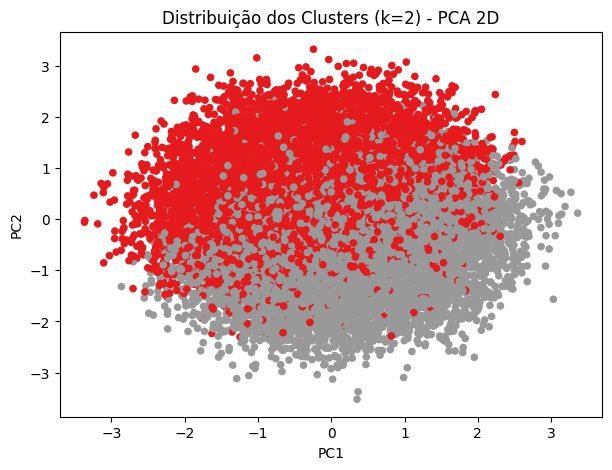

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2, random_state=42).fit_transform(Xtr_km)

plt.figure(figsize=(7,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=train_clusters, cmap="Set1", s=20)
plt.title("Distribuição dos Clusters (k=2) - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [21]:
def classify_candidate(candidate_dict, preprocessor, model, cluster_names):
    """
    Recebe um dicionário com informações do candidato e retorna:
    - número do cluster
    - nome interpretado do cluster
    - rótulo predominante no grupo
    """
    candidate_df = pd.DataFrame([candidate_dict])
    Xcand = preprocessor.transform(candidate_df)
    cluster_pred = model.predict(Xcand)[0]

    cluster_name = cluster_names.get(cluster_pred, "Desconhecido")
    class_pred = cluster_to_class.get(cluster_pred, "Indefinido")

    print(f"\n📍 Cluster atribuído: {cluster_pred}")
    print(f"🧭 Interpretação: {cluster_name}")
    print(f"📊 Classe predominante nesse grupo: {class_pred}")

    return cluster_pred, cluster_name, class_pred


In [22]:
# Nomeação semântica dos clusters (para interpretação e Groq)
cluster_names = {
    0: "Profissões Estáveis / Adaptadas à IA",
    1: "Profissões em Risco / Alta Automação"
}


In [23]:
candidate = {
    "Industry": "Finance",
    "AI Impact Level": "High",
    "Median Salary (USD)": 72000,
    "Required Education": "Bachelor",
    "Experience Required (Years)": 5,
    "Job Openings (2024)": 1200,
    "Projected Openings (2030)": 1800,
    "Remote Work Ratio (%)": 60,
    "Automation Risk (%)": 85,
    "Gender Diversity (%)": 45,
    "Location": "North America"
}

cluster_pred, cluster_name, class_pred = classify_candidate(candidate, pre_km, km_final, cluster_names)



📍 Cluster atribuído: 1
🧭 Interpretação: Profissões em Risco / Alta Automação
📊 Classe predominante nesse grupo: Increasing


In [24]:
from openai import OpenAI

# Conexão com a API Groq (compatível com OpenAI SDK)
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key="Sua Chave"
)

# === Montar o prompt ===
prompt = f"""
Um candidato atua na indústria {candidate['Industry']} com os seguintes indicadores:
- Nível de impacto da IA: {candidate['AI Impact Level']}
- Salário médio anual: {candidate['Median Salary (USD)']} USD
- Escolaridade exigida: {candidate['Required Education']}
- Experiência exigida: {candidate['Experience Required (Years)']} anos
- Risco de automação: {candidate['Automation Risk (%)']}%
- Cluster atribuído: {cluster_pred} → {cluster_name}
- Classe predominante: {class_pred}

O cluster indica que este profissional pertence ao grupo de {cluster_name.lower()}.
Com base nesses dados, elabore um plano de desenvolvimento de carreira contendo:

1. Habilidades técnicas e comportamentais emergentes relevantes, traga em formato de texto
2. Áreas de requalificação para os próximos 5 anos.
3. Estratégias práticas para manter-se competitivo até 2030.
4. Setores e funções com maior potencial de crescimento para o perfil.
5. Um resumo motivacional com foco em adaptação à IA e produtividade.
"""

# === Chamada ao modelo Groq ===
response = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {"role": "system", "content": "Você é um consultor de carreira especializado em IA e automação de empregos."},
        {"role": "user", "content": prompt}
    ]
)

# === Exibir resultado ===
print("💡 Recomendações personalizadas:\n")
print(response.choices[0].message.content)


💡 Recomendações personalizadas:

**Plano de Desenvolvimento de Carreira para Profissional em Risco/Hlava Automação**

**Habilidades Técnicas e Comportamentais Emergentes Relevantes**

Com a alta automação no setor financeiro, é fundamental que o profissional desenvolva habilidades técnicas e comportamentais emergentes relevantes para manter-se competitivo. Aqui estão algumas opções:

**Habilidades Técnicas:**

- Desenvolvimento de modelos preditivos e aprendizado de máquina (ML) para análise de dados financeiros
- Programação em linguagens como Python, R ou SQL
- Trabalho com bases de dados em nuvem, como AWS, Azure ou Google Cloud
- Experiência com ferramentas de inteligência artificial, como IBM Watson ou Microsoft Azure AI
- Conhecimento em segurança da informação e conformidade regulatória

**Habilidades Comportamentais:**

- Pensamento crítico e resolução de problemas em ambientes de alta complexidade
- Comunicação eficaz em equipe e com stakeholders
- Adaptação rápida às mudanças

## Teste candidato dinamico

In [25]:
import gradio as gr

def gerar_recomendacoes_groq(industry, ai_impact, salary, education, exp, openings24, openings30, remote, automation, gender, location):
    candidate = {
        "Industry": industry,
        "AI Impact Level": ai_impact,
        "Median Salary (USD)": salary,
        "Required Education": education,
        "Experience Required (Years)": exp,
        "Job Openings (2024)": openings24,
        "Projected Openings (2030)": openings30,
        "Remote Work Ratio (%)": remote,
        "Automation Risk (%)": automation,
        "Gender Diversity (%)": gender,
        "Location": location
    }

    cluster_pred, cluster_name, class_pred = classify_candidate(candidate, pre_km, km_final, cluster_names)

    prompt = f"""Candidato do setor {industry}, cluster {cluster_pred} ({cluster_name}).
Classe predominante: {class_pred}.
Descreva recomendações personalizadas de carreira para este perfil até 2030."""

    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[
            {"role": "system", "content": "Você é um consultor de carreira especializado em IA e automação."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message.content


# === Interface aprimorada ===
with gr.Blocks(theme="gradio/soft") as demo:
    gr.Markdown(
        "<h1 style='text-align:center;'>📊 Simulador de Impacto da IA no Mercado de Trabalho</h1>"
        "<p style='text-align:center;'>Descubra como a IA pode influenciar sua carreira e receba recomendações personalizadas com base no seu perfil profissional.</p>"
    )

    with gr.Row():
        with gr.Column(scale=1):
            industry = gr.Textbox(label="Industry", placeholder="Ex: Finance, Health, Education", scale=2)
            ai_impact = gr.Textbox(label="AI Impact Level", placeholder="Low / Medium / High", scale=2)
            salary = gr.Number(label="Median Salary (USD)")
            education = gr.Textbox(label="Required Education", placeholder="Bachelor, Master, etc.", scale=2)
            exp = gr.Number(label="Experience Required (Years)")
            openings24 = gr.Number(label="Job Openings (2024)")
            openings30 = gr.Number(label="Projected Openings (2030)")
            remote = gr.Slider(0, 100, label="Remote Work Ratio (%)")
            automation = gr.Slider(0, 100, label="Automation Risk (%)")
            gender = gr.Slider(0, 100, label="Gender Diversity (%)")
            location = gr.Textbox(label="Location", placeholder="Ex: North America, Europe", scale=2)
            btn = gr.Button("Gerar Recomendações 💡")

        with gr.Column(scale=2):
            output = gr.Textbox(
                label="Recomendações de Carreira (Groq)",
                placeholder="As sugestões personalizadas aparecerão aqui...",
                lines=15,  # aumenta altura
                scale=2
            )

    btn.click(
        gerar_recomendacoes_groq,
        inputs=[industry, ai_impact, salary, education, exp, openings24, openings30, remote, automation, gender, location],
        outputs=output
    )

demo.launch(share=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


theme_schema%400.0.3.json: 0.00B [00:00, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b6ad1adb0fa533a66.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
